Optimize a model with 40201 rows, 40200 columns and 120200 nonzeros
Variable types: 0 continuous, 40200 integer (40200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-03, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve time: 0.27s
Presolved: 40201 rows, 40200 columns, 120200 nonzeros
Variable types: 0 continuous, 40200 integer (40200 binary)
Found heuristic solution: objective 22.6468692

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Presolved: 40201 rows, 40200 columns, 120200 nonzeros

Concurrent spin time: 0.03s

Solved with dual simplex

Root relaxation: objective 1.445152e+01, 2537 iterations, 1.26 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   14.45152    0   92   22.64687   14.45152  36.2%     -    1s
H    0     0                     

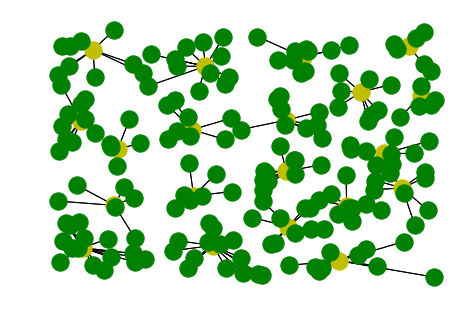

In [9]:
from gurobipy import *

def kmedian(m, n, c, k, strong=True):
    model = Model("k-median")
    y = {}
    x = {}
    for j in range(m):
        y[j] = model.addVar(obj=0, vtype="B", name="y[%s]"%j)
        for i in range(n):
            x[i,j] = model.addVar(obj=c[i,j], vtype="B", name="x[%s,%s]"%(i,j))    
    model.update()
    
    for i in range(n):
        coef = [1 for j in range(m)]
        var = [x[i,j] for j in range(m)]
        model.addConstr(LinExpr(coef,var), "=", 1, name="Assign[%s]"%i)

    if strong == True:
        for j in range(m):
            for i in range(n):
                model.addConstr(x[i,j], "<", y[j], name="Strong[%s,%s]"%(i,j))
    else:
        for j in range(m):
            coef = [1 for i in range(n)]
            var = [x[i,j] for i in range(n)]
            model.addConstr(LinExpr(coef,var), "<", LinExpr(n,y[j]), name="Weak[%s]"%j)
        
    coef = [1 for j in range(m)]
    var = [y[j] for j in range(m)]
    model.addConstr(LinExpr(coef,var), "=", rhs=k, name="k_median")              

    model.update()
    model.__data = x,y
    return model


import math
import random
def distance(x1, y1, x2, y2):
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)


def make_data(n):
    # positions of the points in the plane
    x = [random.random() for i in range(n)]
    y = [random.random() for i in range(n)]

    c = {}
    for i in range(n):
        for j in range(n):
            c[i,j] = distance(x[i],y[i],x[j],y[j])

    return c, x, y

                
if __name__ == "__main__":
    import sys
    random.seed(67)
    n = 200
    c, x_pos, y_pos = make_data(n)
    m = n
    k = 20
    model = kmedian(m, n, c, k, strong=True)
    # model.Params.Threads = 1
    model.optimize()
    EPS = 1.e-6
    x,y = model.__data
    edges = [(i,j) for (i,j) in x if x[i,j].X > EPS]
    nodes = [j for j in y if y[j].X > EPS]
    print("Optimal value=%f", model.ObjVal)
    print("Selected nodes:%f", nodes)
    print("Edges:%f", edges)
    print("max c:%f", max([c[i,j] for (i,j) in edges]))

    try: # plot the result using networkx and matplotlib
        import networkx as NX
        import matplotlib.pyplot as P 
        P.ion() # interactive mode on
        G = NX.Graph()

        other = [j for j in y if j not in nodes]
        G.add_nodes_from(nodes)
        G.add_nodes_from(other)
        for (i,j) in edges:
            G.add_edge(i,j)

        position = {}
        for i in range(n):
            position[i]=(x_pos[i],y_pos[i])

        NX.draw(G, position, node_color='y', nodelist=nodes)
        NX.draw(G, position, node_color='g', nodelist=other)
    except ImportError:
        print("install 'networkx' and 'matplotlib' for plotting")



In [12]:
for i in range(3):
        coef = [1 for j in range(2)]
        var = [x[i,j] for j in range(2)]
        print(LinExpr(coef,var))

<gurobi.LinExpr: x[0,0] + x[0,1]>
<gurobi.LinExpr: x[1,0] + x[1,1]>
<gurobi.LinExpr: x[2,0] + x[2,1]>
